# Dataset

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

The dataset includes 23,486 rows and 10 features. Each row represents a customer review, and includes the variables:

<b>Clothing ID</b>: Integer Categorical variable that refers to the specific piece being reviewed.

<b>Age</b>: Positive Integer variable of the reviewers age.

<b>Title</b>: String variable for the title of the review.

<b>Review Text</b>: String variable for the review body.

<b>Rating</b>: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

<b>Recommended IND</b>: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

<b>Positive Feedback Count</b>: Positive Integer documenting the number of other customers who found this review positive.

<b>Division Name</b>: Categorical name of the product high level division.

<b>Department Name</b>: Categorical name of the product department name.

<b>Class Name</b>: Categorical name of the product class name.

# Exploration

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
%matplotlib inline

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore') 

from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag, pos_tag_sents
from nltk.corpus import wordnet

In [3]:
df = pd.read_csv('womens-clothing.csv', sep = ';')


In [4]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [6]:
df.shape

(23486, 10)

In [7]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [9]:
# Unique values for each column

df.nunique() 

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [10]:
# Standardise columns names

df.columns = [e.lower().replace(' ', '_') for e in df.columns]

In [11]:
# Most reviewed item is # 1078

df['clothing_id'].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
        ... 
792        1
776        1
744        1
728        1
0          1
Name: clothing_id, Length: 1206, dtype: int64

In [12]:
# df[(df.clothing_id == 1078)]

In [13]:
# Dresses are the most common category

df['class_name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class_name, dtype: int64

In [14]:
px.histogram(df, x = df['class_name']).update_xaxes(categoryorder = 'total ascending')


In [15]:
# Stats about each category

class_name_df = df.groupby("class_name")
class_name_df.describe()

clothing_id                                                   \
                     count         mean         std    min      25%     50%   
class_name                                                                    
Blouses             3097.0   832.029706   14.048105  815.0   827.00   830.0   
Casual bottoms         2.0    49.500000    6.363961   45.0    47.25    49.5   
Chemises               1.0    10.000000         NaN   10.0    10.00    10.0   
Dresses             6319.0  1087.463206   40.372273   13.0  1078.00  1086.0   
Fine gauge          1100.0   901.386364   28.841047   21.0   895.00   902.0   
Intimates            154.0   385.519481  321.802607   14.0    79.25   359.5   
Jackets              704.0   975.223011   11.679211  955.0   966.00   975.0   
Jeans               1147.0  1028.536181   53.919865    9.0  1025.00  1031.0   
Knits               4843.0   867.427834   29.964662    2.0   862.00   867.0   
Layering             146.0   429.184932  316.610475    1.0   166.00   463.0   
Legwear              165.0   216.927273  161.018767   41.0   155.00   169.0   
Lounge               691.0   494.399421  212.657688   60.0   294.00   498.0   
Outerwear            328.0  1111.945122  106.309959    0.0  1117.00  1122.0   
Pants               1388.0  1038.859510  107.494054  135.0  1052.00  1059.0   
Shorts               317.0   434.457413  165.169942   36.0   316.00   456.0   
Skirts               945.0  1005.970370    9.356701  987.0   996.00  1008.0   
Sleep                228.0   314.065789  219.130098   64.0   147.00   198.0   
Sweaters            1428.0   934.441877   49.829268    3.0   933.00   936.0   
Swim                 350.0   415.285714  246.411189    8.0   254.00   382.0   
Trend                119.0   887.008403  285.814551  548.0   569.00  1135.0   

                                    age             ... recommended_ind       \
                    75%     max   count       mean  ...             75%  max   
class_name                                          ...                        
Blouses          836.00  1180.0  3097.0  44.252502  ...             1.0  1.0   
Casual bottoms    51.75    54.0     2.0  26.500000  ...             1.0  1.0   
Chemises          10.00    10.0     1.0  38.000000  ...             1.0  1.0   
Dresses         1095.00  1202.0  6319.0  42.114892  ...             1.0  1.0   
Fine gauge       907.00  1188.0  1100.0  44.730909  ...             1.0  1.0   
Intimates        695.00  1178.0   154.0  39.155844  ...             1.0  1.0   
Jackets          984.00  1119.0   704.0  43.813920  ...             1.0  1.0   
Jeans           1035.00  1190.0  1147.0  43.115955  ...             1.0  1.0   
Knits            872.00  1187.0  4843.0  43.630807  ...             1.0  1.0   
Layering         520.00  1203.0   146.0  41.527397  ...             1.0  1.0   
Legwear          215.00   784.0   165.0  41.545455  ...             1.0  1.0   
Lounge           674.00  1162.0   691.0  42.717800  ...             1.0  1.0   
Outerwear       1126.00  1134.0   328.0  44.286585  ...             1.0  1.0   
Pants           1060.00  1205.0  1388.0  44.047550  ...             1.0  1.0   
Shorts           579.00   749.0   317.0  40.728707  ...             1.0  1.0   
Skirts          1011.00  1021.0   945.0  42.492063  ...             1.0  1.0   
Sleep            504.00  1163.0   228.0  43.100877  ...             1.0  1.0   
Sweaters         941.00   954.0  1428.0  45.064426  ...             1.0  1.0   
Swim             470.75  1177.0   350.0  38.048571  ...             1.0  1.0   
Trend           1144.00  1147.0   119.0  44.058824  ...             1.0  1.0   

               positive_feedback_count                                     \
                                 count      mean       std  min  25%  50%   
class_name                                                                  
Blouses                         3097.0  2.725218  5.401250  0.0  0.0  1.0   
Casual bottoms                     2.0  0.000000

In [16]:
# Five is the most common rating

df['rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

In [17]:
px.histogram(df, x = df['rating'])

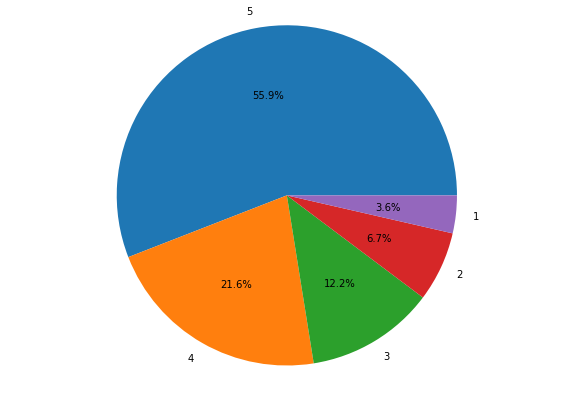

In [18]:
plt.figure(figsize =(10, 7)) 
plt.pie([13131, 5077, 2871, 1565, 842], labels = ['5', '4', '3', '2', '1'], autopct='%1.1f%%');
plt.axis('equal')
plt.show()

In [19]:
# Whether the customer recommend the variable or not will be used as the target variable
# The sample is skewed: There are way more people that would recommend a product than not

df['recommended_ind'].value_counts()

1    19314
0     4172
Name: recommended_ind, dtype: int64

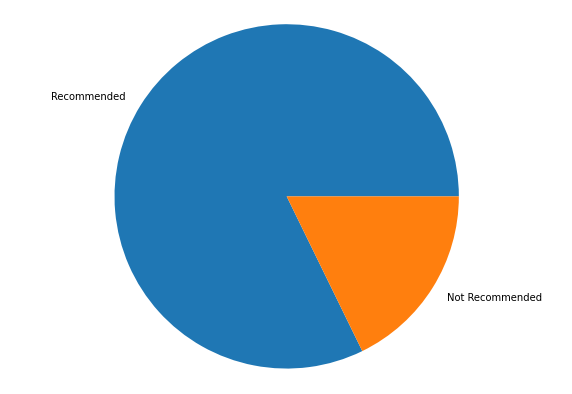

In [2]:

plt.figure(figsize =(10, 7)) 
plt.pie([19314, 4172], labels = ['Recommended', 'Not Recommended']);
plt.axis('equal')
plt.show()

In [21]:
# Grouping ratings by recommended yes/no

df.groupby(['rating', 'recommended_ind'])['recommended_ind'].count()

# There are a few people who claimed they would recommend a product even though they rated only 1 or 2
# This could possibly be a typo


rating  recommended_ind
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: recommended_ind, dtype: int64

In [22]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [23]:
# Create new dataframe with extracted features

reviews_df = df[['review_text', 'recommended_ind', 'age', 'class_name', 'department_name']]


In [24]:
reviews_df = reviews_df.rename(columns = {"review_text": "review", "recommended_ind": "recommended", "class_name": "class", "department_name": "department"})


In [25]:
reviews_df.head()

review  recommended  age  \
0  Absolutely wonderful - silky and sexy and comf...            1   33   
1  Love this dress!  it's sooo pretty.  i happene...            1   34   
2  I had such high hopes for this dress and reall...            0   60   
3  I love, love, love this jumpsuit. it's fun, fl...            1   50   
4  This shirt is very flattering to all due to th...            1   47   

       class department  
0  Intimates   Intimate  
1    Dresses    Dresses  
2    Dresses    Dresses  
3      Pants    Bottoms  
4    Blouses       Tops

In [26]:
# Check null values

reviews_df.isnull().sum() * 100 / reviews_df.shape[0]  

review         3.597888
recommended    0.000000
age            0.000000
class          0.059610
department     0.059610
dtype: float64

In [27]:
# Remove null values 

reviews_df.review.isna().sum()

845

In [28]:
# Drop rows without reviews

reviews_df = reviews_df.dropna(subset = ['review'])

In [29]:
reviews_df.head()

review  recommended  age  \
0  Absolutely wonderful - silky and sexy and comf...            1   33   
1  Love this dress!  it's sooo pretty.  i happene...            1   34   
2  I had such high hopes for this dress and reall...            0   60   
3  I love, love, love this jumpsuit. it's fun, fl...            1   50   
4  This shirt is very flattering to all due to th...            1   47   

       class department  
0  Intimates   Intimate  
1    Dresses    Dresses  
2    Dresses    Dresses  
3      Pants    Bottoms  
4    Blouses       Tops

In [30]:
reviews_df.shape

(22641, 5)

In [31]:
# Create column 'length'

reviews_df['length'] = reviews_df['review'].astype(str).apply(len)


In [32]:
# The average length of a review is 308 words

reviews_df['length'].describe()

count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: length, dtype: float64

In [33]:
reviews_df

review  recommended  age  \
0      Absolutely wonderful - silky and sexy and comf...            1   33   
1      Love this dress!  it's sooo pretty.  i happene...            1   34   
2      I had such high hopes for this dress and reall...            0   60   
3      I love, love, love this jumpsuit. it's fun, fl...            1   50   
4      This shirt is very flattering to all due to th...            1   47   
...                                                  ...          ...  ...   
23481  I was very happy to snag this dress at such a ...            1   34   
23482  It reminds me of maternity clothes. soft, stre...            1   48   
23483  This fit well, but the top was very see throug...            0   31   
23484  I bought this dress for a wedding i have this ...            1   28   
23485  This dress in a lovely platinum is feminine an...            1   52   

           class department  length  
0      Intimates   Intimate      53  
1        Dresses    Dresses     303  
2        Dresses    Dresses     500  
3          Pants    Bottoms     124  
4        Blouses       Tops     192  
...          ...        ...     ...  
23481    Dresses    Dresses     131  
23482      Knits       Tops     223  
23483    Dresses    Dresses     208  
23484    Dresses    Dresses     427  
23485    Dresses    Dresses     110  

[22641 rows x 6 columns]

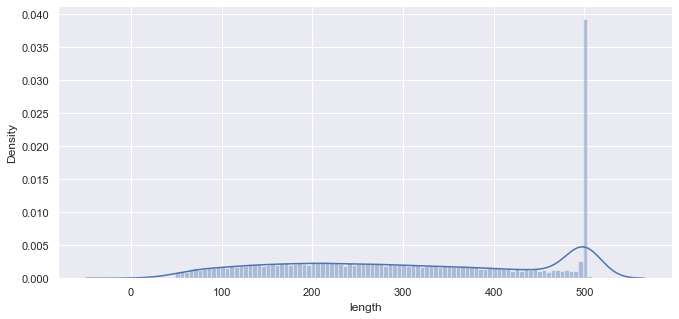

In [34]:
# Most reviews are long (aprox 500 words)

sns.set(rc = {'figure.figsize':(11,5)})
sns.distplot(reviews_df['length'], hist = True, bins = 100);

In [35]:
px.box(reviews_df, x = "recommended", y = "length")

In [36]:
# Separating the data frame into reviews that would recommend vs. would not recommend

df_zero = reviews_df[reviews_df['recommended'] == 0]
df_one = reviews_df[reviews_df['recommended'] == 1]

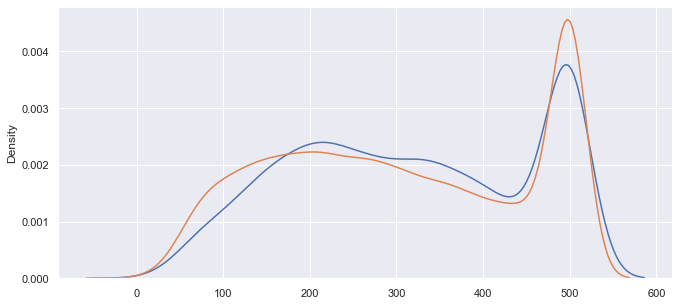

In [37]:
# Out of the longer reviews most would not recommend

sns.distplot(df_zero[['length']], hist = False);
sns.distplot(df_one[['length']], hist = False);

In [38]:
# Check for polarity using textblob

reviews_df['polarity'] = reviews_df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_df.head(5)

review  recommended  age  \
0  Absolutely wonderful - silky and sexy and comf...            1   33   
1  Love this dress!  it's sooo pretty.  i happene...            1   34   
2  I had such high hopes for this dress and reall...            0   60   
3  I love, love, love this jumpsuit. it's fun, fl...            1   50   
4  This shirt is very flattering to all due to th...            1   47   

       class department  length  polarity  
0  Intimates   Intimate      53  0.633333  
1    Dresses    Dresses     303  0.339583  
2    Dresses    Dresses     500  0.073675  
3      Pants    Bottoms     124  0.550000  
4    Blouses       Tops     192  0.512891

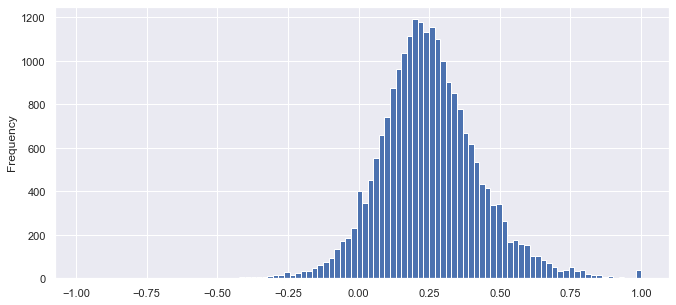

In [39]:
# Polarity is normally distributed around 0.25 (1 = very positive, and -1 = very negative)

reviews_df['polarity'].plot(kind = 'hist', bins = 100);

# Cleaning

In [40]:
# Create a copy 

reviews_prep = reviews_df.copy()

In [41]:
# Convert all reviews to lowercase

reviews_prep['lower'] = reviews_prep['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews_prep['lower'].head()

0    absolutely wonderful - silky and sexy and comf...
1    love this dress! it's sooo pretty. i happened ...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
Name: lower, dtype: object

In [42]:
# Remove punctuation

reviews_prep['no_punc'] = reviews_prep['lower'].str.replace('[^\w\s]','')
reviews_prep['no_punc'].head()

0    absolutely wonderful  silky and sexy and comfo...
1    love this dress its sooo pretty i happened to ...
2    i had such high hopes for this dress and reall...
3    i love love love this jumpsuit its fun flirty ...
4    this shirt is very flattering to all due to th...
Name: no_punc, dtype: object

In [43]:
# Correct spelling mistakes with TextBlob

# reviews_df['review'].apply(lambda x: str(TextBlob(x).correct()))

In [44]:
# Remove stopwords

stop = stopwords.words('english')
reviews_prep['no_stop'] = reviews_prep['no_punc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
reviews_prep['no_stop'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: no_stop, dtype: object

In [45]:
# Remove numbers 

reviews_prep['no_num'] = reviews_prep['no_stop'].str.replace('\d+', '')
reviews_prep['no_num'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: no_num, dtype: object

In [46]:
# Review the most common words

pd.Series(' '.join(reviews_prep['no_num']).split()).value_counts()[:10]

dress    10461
love      8916
size      8693
top       7323
fit       7241
like      6992
wear      6414
great     6076
im        5988
would     5010
dtype: int64

In [47]:
# Wordclouds

text = " ".join(review for review in reviews_prep['no_num'])
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 4230017 words in the combination of all reviews.


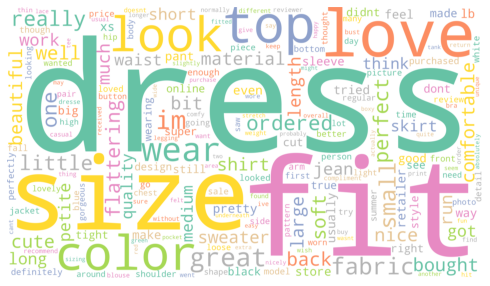

In [48]:
# Generate wordCloud

wordcloud = WordCloud(width = 7000, height = 4000, random_state = 1, 
                      background_color = 'white', colormap = 'Set2', collocations = False, 
                      min_font_size = 10).generate(text)

# Display the image 

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [49]:
# Create a list of additional words that do not add meaning to the analysis

additional_stopwords = ['dress', 'top', 'fit', 'look', 'wear', 'material', 'fabric', 'size', 'im', 
                        'one', 'style', 'would', 'sweater', 'shirt', 'skirt', 'white', 'black',
                       'jeans', 'order', 'color']

In [50]:
reviews_prep['words_removed'] = reviews_prep['no_num'].apply(lambda x: " ".join(x for x in x.split() if x not in additional_stopwords))
reviews_prep['words_removed'].head()


0          absolutely wonderful silky sexy comfortable
1    love sooo pretty happened find store glad bc n...
2    high hopes really wanted work initially ordere...
3    love love love jumpsuit fun flirty fabulous ev...
4    flattering due adjustable front tie perfect le...
Name: words_removed, dtype: object

In [51]:
text_1 = " ".join(review for review in reviews_prep['words_removed'])
print ("There are {} words in the combination of all reviews.".format(len(text_1)))

There are 3754775 words in the combination of all reviews.


In [52]:
# Create two data frames for 'positive' and 'negative' words

pos_df = reviews_prep[reviews_prep['recommended'] == 1]
neg_df = reviews_prep[reviews_prep['recommended'] == 0]


In [53]:
pos_words = " ".join(review for review in pos_df['words_removed'])
neg_words = " ".join(review for review in neg_df['words_removed'])


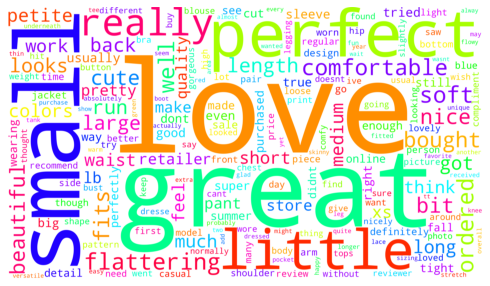

In [54]:
# Generate wordCloud

wordcloud = WordCloud(width = 7000, height = 4000, random_state = 1, 
                      background_color = 'white', colormap = 'hsv', collocations = False, 
                      min_font_size = 10).generate(pos_words)

# Display the image 

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

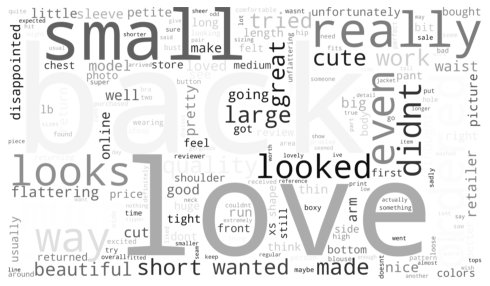

In [55]:
# Generate wordCloud

wordcloud = WordCloud(width = 7000, height = 4000, random_state = 1, 
                      background_color = 'white', colormap = 'Greys', collocations = False, 
                      min_font_size = 10).generate(neg_words)

# Display the image 

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [56]:
# Interesting to see that there are many words with a 'positive' connotation such as 
# love and good appearing in the negative wordcloud

# Preprocessing

In [57]:
# Tokenization

# Create Tokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [58]:
reviews_prep['token'] = reviews_prep['words_removed'].apply(lambda x: tokenizer.tokenize(x.lower()))
reviews_prep['token'].head(5)


0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, sooo, pretty, happened, find, store, gl...
2    [high, hopes, really, wanted, work, initially,...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [flattering, due, adjustable, front, tie, perf...
Name: token, dtype: object

In [59]:
# Add speech tags

reviews_prep['pos_tags'] = reviews_prep['token'].apply(nltk.tag.pos_tag)
reviews_prep['pos_tags'].head()

0    [(absolutely, RB), (wonderful, JJ), (silky, JJ...
1    [(love, VB), (sooo, NN), (pretty, RB), (happen...
2    [(high, JJ), (hopes, NNS), (really, RB), (want...
3    [(love, VB), (love, NN), (love, NN), (jumpsuit...
4    [(flattering, VBG), (due, JJ), (adjustable, JJ...
Name: pos_tags, dtype: object

In [60]:
# Define function to convert parts of speech tags to wordnet’s format

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [61]:
# Apply the function to the tagged data

reviews_prep['lemmatized'] = reviews_prep['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
reviews_prep['lemmatized'].head()

0    [(absolutely, r), (wonderful, a), (silky, a), ...
1    [(love, v), (sooo, n), (pretty, r), (happened,...
2    [(high, a), (hopes, n), (really, r), (wanted, ...
3    [(love, v), (love, n), (love, n), (jumpsuit, n...
4    [(flattering, v), (due, a), (adjustable, a), (...
Name: lemmatized, dtype: object

In [62]:
# Create lemmatizer

lemmatizer = WordNetLemmatizer()

# Apply to data 

reviews_prep['lemmatized'] = reviews_prep['lemmatized'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
reviews_prep.head(3)

review  recommended  age  \
0  Absolutely wonderful - silky and sexy and comf...            1   33   
1  Love this dress!  it's sooo pretty.  i happene...            1   34   
2  I had such high hopes for this dress and reall...            0   60   

       class department  length  polarity  \
0  Intimates   Intimate      53  0.633333   
1    Dresses    Dresses     303  0.339583   
2    Dresses    Dresses     500  0.073675   

                                               lower  \
0  absolutely wonderful - silky and sexy and comf...   
1  love this dress! it's sooo pretty. i happened ...   
2  i had such high hopes for this dress and reall...   

                                             no_punc  \
0  absolutely wonderful  silky and sexy and comfo...   
1  love this dress its sooo pretty i happened to ...   
2  i had such high hopes for this dress and reall...   

                                             no_stop  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store im ...   
2  high hopes dress really wanted work initially ...   

                                              no_num  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store im ...   
2  high hopes dress really wanted work initially ...   

                                       words_removed  \
0        absolutely wonderful silky sexy comfortable   
1  love sooo pretty happened find store glad bc n...   
2  high hopes really wanted work initially ordere...   

                                               token  \
0  [absolutely, wonderful, silky, sexy, comfortable]   
1  [love, sooo, pretty, happened, find, store, gl...   
2  [high, hopes, really, wanted, work, initially,...   

                                            pos_tags  \
0  [(absolutely, RB), (wonderful, JJ), (silky, JJ...   
1  [(love, VB), (sooo, NN), (pretty, RB), (happen...   
2  [(high, JJ), (hopes, NNS), (really, RB), (want...   

                                          lemmatized  
0  [absolutely, wonderful, silky, sexy, comfortable]  
1  [love, sooo, pretty, happen, find, store, glad...  
2  [high, hope, really, want, work, initially, or...

In [63]:
reviews_prep['joined'] = reviews_prep['lemmatized'].apply(lambda x: ' '.join(x))
reviews_prep.head(30)

review  recommended  age  \
0   Absolutely wonderful - silky and sexy and comf...            1   33   
1   Love this dress!  it's sooo pretty.  i happene...            1   34   
2   I had such high hopes for this dress and reall...            0   60   
3   I love, love, love this jumpsuit. it's fun, fl...            1   50   
4   This shirt is very flattering to all due to th...            1   47   
5   I love tracy reese dresses, but this one is no...            0   49   
6   I aded this in my basket at hte last mintue to...            1   39   
7   I ordered this in carbon for store pick up, an...            1   39   
8   I love this dress. i usually get an xs but it ...            1   24   
9   I'm 5"5' and 125 lbs. i ordered the s petite t...            1   34   
10  Dress runs small esp where the zipper area run...            0   53   
11  This dress is perfection! so pretty and flatte...            1   39   
12  More and more i find myself reliant on the rev...            1   53   
13  Bought the black xs to go under the larkspur m...            1   44   
14  This is a nice choice for holiday gatherings. ...            1   50   
15  I took these out of the package and wanted the...            1   47   
16  Material and color is nice.  the leg opening i...            1   34   
17  Took a chance on this blouse and so glad i did...            1   41   
18  A flattering, super cozy coat.  will work well...            1   32   
19  I love the look and feel of this tulle dress. ...            1   47   
20  If this product was in petite, i would get the...            1   33   
21  I'm upset because for the price of the dress, ...            1   55   
22  First of all, this is not pullover styling. th...            0   31   
23  Cute little dress fits tts. it is a little hig...            1   34   
24  I love this shirt because when i first saw it,...            1   55   
25  Loved the material, but i didnt really look at...            0   31   
26  I have been waiting for this sweater coat to s...            0   33   
27  The colors weren't what i expected either. the...            1   31   
28  I have several of goodhyouman shirts and i get...            1   53   
29  This sweater is so comfy and classic - it bala...            1   28   

        class department  length  polarity  \
0   Intimates   Intimate      53  0.633333   
1     Dresses    Dresses     303  0.339583   
2     Dresses    Dresses     500  0.073675   
3       Pants    Bottoms     124  0.550000   
4     Blouses       Tops     192  0.512891   
5     Dresses    Dresses     488  0.178750   
6       Knits       Tops     496  0.133750   
7       Knits       Tops     482  0.171635   
8     Dresses    Dresses     166  0.002500   
9     Dresses    Dresses     360  0.204200   
10    Dresses    Dresses     336 -0.097149   
11    Dresses    Dresses      51  0.250000   
12    Dresses    Dresses     502  0.244156   
13  Intimates   Intimate     377  0.192143   
14    Dresses    Dresses     500 -0.057143   
15      Pants    Bottoms     470  0.166587   
16      Pants    Bottoms     359  0.134921   
17    Blouses       Tops     296  0.227083   
18  Outerwear    Jackets     167  0.102381   
19    Dresses    Dresses     292  0.431818   
20    Blouses       Tops     298  0.216204   
21    Dresses    Dresses     500  0.124621   
22    Dresses    Dresses     437 -0.045595   
23    Dresses    Dresses     202  0.269286   
24    Blouses       Tops     443  0.258333   
25     Lounge   Intimate     340  0.261508   
26   Sweaters       Tops     500  0.101818   
27     Skirts    Bottoms     245  0.179630   
28     Lounge   Intimate     192  0.000000   
29   Sweaters       Tops     445  0.282917   

                                                lower  \
0   absolutely wonderful - silky and sexy and comf...   
1   love this dress! it's sooo pretty. i happened ...   
2   i had such high hopes for this dress and reall...   
3   i love, love, love this jumpsuit. it's fun, fl...   
4   this 

In [64]:
#reviews_prep.to_csv('clothing_reviews_clean_with_features.csv')

In [65]:
reviews_prep['polarity_clean'] = reviews_prep['joined'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [66]:
reviews_prep.head()

review  recommended  age  \
0  Absolutely wonderful - silky and sexy and comf...            1   33   
1  Love this dress!  it's sooo pretty.  i happene...            1   34   
2  I had such high hopes for this dress and reall...            0   60   
3  I love, love, love this jumpsuit. it's fun, fl...            1   50   
4  This shirt is very flattering to all due to th...            1   47   

       class department  length  polarity  \
0  Intimates   Intimate      53  0.633333   
1    Dresses    Dresses     303  0.339583   
2    Dresses    Dresses     500  0.073675   
3      Pants    Bottoms     124  0.550000   
4    Blouses       Tops     192  0.512891   

                                               lower  \
0  absolutely wonderful - silky and sexy and comf...   
1  love this dress! it's sooo pretty. i happened ...   
2  i had such high hopes for this dress and reall...   
3  i love, love, love this jumpsuit. it's fun, fl...   
4  this shirt is very flattering to all due to th...   

                                             no_punc  \
0  absolutely wonderful  silky and sexy and comfo...   
1  love this dress its sooo pretty i happened to ...   
2  i had such high hopes for this dress and reall...   
3  i love love love this jumpsuit its fun flirty ...   
4  this shirt is very flattering to all due to th...   

                                             no_stop  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store im ...   
2  high hopes dress really wanted work initially ...   
3  love love love jumpsuit fun flirty fabulous ev...   
4  shirt flattering due adjustable front tie perf...   

                                              no_num  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store im ...   
2  high hopes dress really wanted work initially ...   
3  love love love jumpsuit fun flirty fabulous ev...   
4  shirt flattering due adjustable front tie perf...   

                                       words_removed  \
0        absolutely wonderful silky sexy comfortable   
1  love sooo pretty happened find store glad bc n...   
2  high hopes really wanted work initially ordere...   
3  love love love jumpsuit fun flirty fabulous ev...   
4  flattering due adjustable front tie perfect le...   

                                               token  \
0  [absolutely, wonderful, silky, sexy, comfortable]   
1  [love, sooo, pretty, happened, find, store, gl...   
2  [high, hopes, really, wanted, work, initially,...   
3  [love, love, love, jumpsuit, fun, flirty, fabu...   
4  [flattering, due, adjustable, front, tie, perf...   

                                            pos_tags  \
0  [(absolutely, RB), (wonderful, JJ), (silky, JJ...   
1  [(love, VB), (sooo, NN), (pretty, RB), (happen...   
2  [(high, JJ), (hopes, NNS), (really, RB), (want...   
3  [(love, VB), (love, NN), (love, NN), (jumpsuit...   
4  [(flattering, VBG), (due, JJ), (adjustable, JJ...   

                                          lemmatized  \
0  [absolutely, wonderful, silky, sexy, comfortable]   
1  [love, sooo, pretty, happen, find, store, glad...   
2  [high, hope, really, want, work, initially, or...   
3  [love, love, love, jumpsuit, fun, flirty, fabu...   
4  [flatter, due, adjustable, front, tie, perfect...   

                                              joined  polarity_clean  
0        absolutely wonderful silky sexy comfortable        0.633333  
1  love sooo pretty happen find store glad bc nev...        0.318750  
2  high hope really want work initially order pet...        0.045530  
3  love love love jumpsuit fun flirty fabulous ev...        0.500000  
4  flatter due adjustable front tie perfect lengt...        0.458333